## Choose Root Directory

Uncomment the directory of your choice
- Mount Google Drive's root_dir
- OR define your own root_dir

In [4]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = '/content/drive/MyDrive/'


Mounted at /content/drive


In [ ]:
# replace 'PATH' with your desired project directory
root_dir = r'D:\Files\Projects\Deep Learning\\' # add an extra '\' at the end

# Download Original Model (Original-HVoice)
- https://github.com/yohannarodriguez/Deep4SNet

Download the 2 following files:
- model_deep4SNet.h5
- weights_Deep4SNet.h5

After:
- Run the code to create the folder that will hold the files
- Place both .h5 files inside the folder named 'Deep4SNet-Original-HVoice' in the model_dir

In [ ]:
import os

model_dir = root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Original-HVoice'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

NameError: name 'root_dir' is not defined

# Data (ONLY RUN ONCE)
- no need to run if you have histograms stored in set folders

## Unzip datasets
- Modify the directories to your desire but KEEP the integrity that is after '/Voice_Cloning_Detection/'
- This places the project inside the /Voice_Cloning_Detection/ folder

In [ ]:
# Create main folders
import os
sif_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC'
h_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice'
iS_dir = root_dir + 'Voice_Cloning_Detection/Data/Import/SiF-DeepVC'
iH_dir = root_dir + 'Voice_Cloning_Detection/Data/Import/H-Voice'

if not os.path.exists(sif_dir):
    os.makedirs(sif_dir)
if not os.path.exists(h_dir):
    os.makedirs(h_dir)
if not os.path.exists(iS_dir):
    os.makedirs(iS_dir)
if not os.path.exists(iH_dir):
    os.makedirs(iH_dir)

### SiF-DeepVC (UNCOMMENT & RUN ONCE)

Instructions:
- https://github.com/dstsmallbird/SiF-DeepVC_Dataset
- Download the Google Drive .zip file (7.8 GB) at the zip_dir shown below

Structure:

RQ1 (Part 1)
- "for-real-validation": original human recordings from FoR Validation dataset
- "zh-real-test": original human recordings from MagicData Test dataset

RQ2 (Part 2)
- "for-real-validation-denoised": slightly denoised "for-real-validation"
- "zh-real-test-denoised": slightly denoised "zh-real-test"
- "zh-real-test-silenced": silence-removed "zh-real-test"

RQ3 (Part 3)
- "for-bh-madefake-final-r4k": cloned fake voices by SiF-DeepVC for Farid et al.
- "for-deep4s-madefake-final-r4k": cloned fake voices by SiF-DeepVC for Deep4SNet
- "for-rawnet-madefake-final-r4k": cloned fake voices by SiF-DeepVC for RawNet2

In [ ]:
# Your .zip directory
zip_dir = root_dir + 'Voice_Cloning_Detection/Data/Import/SiF-DeepVC/DeepVC-Dataset.zip'
target_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/All'

# # Create folder
import os
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Unzip ALL files
!unzip "$zip_dir" -d "$target_dir"


### H-Voice (UNCOMMENT & RUN ONCE)

Instructions:
- https://data.mendeley.com/datasets/k47yd3m28w/4
- Click the [Download All 87.8 MB] button and place the .zip file at the zip_dir shown below

Structure:
- Training_fake: 2088 histograms of fake voice recordings (2016 with Imitation and with 72 Deep Voice)
- Training_original: 2020 histograms of original voice recordings
- Validation_fake: 864 histograms of fake voice recordings (all with Imitation)
- Validation_original: 864 histograms of original voice recordings
- External_test1: 760 histograms (380 original + 380 fake with Imitation)
- External_test2: 76 histograms (4 original + 72 fake with Deep Voice)

Their Split:
- Train: 61.57%
- Validation: 25.90%
- Test: 12.53%

In [ ]:
# Your .zip directory -------------------------------------------------------------------------------
zip_dir = root_dir + 'Voice_Cloning_Detection/Data/Import/H-Voice/H-Voice_Dataset.zip'
target_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice/All'

# Create folder
import os
if not os.path.exists(target_dir):
    print("made")
    os.makedirs(target_dir)

# Unzip ALL files
!unzip "$zip_dir" -d "$target_dir"

# Unzip the files in the subfolders
import zipfile
for subdir, dirs, files in os.walk(target_dir):
    print("target: ", target_dir)
    for file in files:
        # Check if the file is a zip file
        if file.endswith('.zip'):
            print("zip")
            zip_path = os.path.join(subdir, file)
            # Unzip the file in its current directory
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(subdir)
            # Delete the zip file
            #os.remove(zip_path)


# Define directories -------------------------------------------------------------------------------
dir_1f = root_dir + 'Voice_Cloning_Detection/Data/H-Voice/Training_Set/fake'
dir_1r = root_dir + 'Voice_Cloning_Detection/Data/H-Voice/Training_Set/real'
dir_2f = root_dir + 'Voice_Cloning_Detection/Data/H-Voice/Validation_Set/fake'
dir_2r = root_dir + 'Voice_Cloning_Detection/Data/H-Voice/Validation_Set/real'
dir_3f = root_dir + 'Voice_Cloning_Detection/Data/H-Voice/Test_Set/fake'
dir_3r = root_dir + 'Voice_Cloning_Detection/Data/H-Voice/Test_Set/real'

# Create directories if they don't exist
for directory in [dir_1f, dir_1r, dir_2f, dir_2r, dir_3f, dir_3r]:
    if not os.path.exists(directory):
        os.makedirs(directory)


# Function to move contents of a directory -------------------------------------------------------------------------------
import shutil
def move_contents(source_dir, target_dir):
    for item in os.listdir(source_dir):
        source_item = os.path.join(source_dir, item)
        if os.path.isfile(source_item):
            shutil.move(source_item, target_dir)
        elif os.path.isdir(source_item):
            # Recursively move contents of subdirectories
            move_contents(source_item, target_dir)

# Move contents of source directories to target directories
move_contents(root_dir + 'Voice_Cloning_Detection/Data/H-Voice/All/Training_fake/Training_fake', dir_1f)
move_contents(root_dir + 'Voice_Cloning_Detection/Data/H-Voice/All/Training_original/Training_original', dir_1r)
move_contents(root_dir + 'Voice_Cloning_Detection/Data/H-Voice/All/Validation_fake/Validation_fake', dir_2f)
move_contents(root_dir + 'Voice_Cloning_Detection/Data/H-Voice/All/Validation_original/Validation_original', dir_2r)
move_contents(root_dir + 'Voice_Cloning_Detection/Data/H-Voice/All/External_test1/External_test1/FAKE', dir_3f)
move_contents(root_dir + 'Voice_Cloning_Detection/Data/H-Voice/All/External_test1/External_test1/ORIGINAL', dir_3r)
move_contents(root_dir + 'Voice_Cloning_Detection/Data/H-Voice/All/External_test2/External_test2/Fake', dir_3f)
move_contents(root_dir + 'Voice_Cloning_Detection/Data/H-Voice/All/External_test2/External_test2/Original', dir_3r)


# Count files after move -------------------------------------------------------------------------------
def count_files(directory):
    file_count = 0
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

counts = {
    'dir_1f': count_files(dir_1f),
    'dir_1r': count_files(dir_1r),
    'dir_2f': count_files(dir_2f),
    'dir_2r': count_files(dir_2r),
    'dir_3f': count_files(dir_3f),
    'dir_3r': count_files(dir_3r)
}
print("\nFiles Count:")
for directory, count in counts.items():
    print(f"{directory}: {count} files")

## Sample data
* 4.5k real voices from FoR
* 4.5k fake voices from against Faird + RawNet
* 1.0k fake voices from against Deep4SNet (as testing later)


In [5]:
import os
import random

# Define the directories
dir_real_for = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ1/for-real-validation'
dir_fake_farid = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ3/for-bh-madefake-final-r4k'
dir_fake_rawnet = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ3/for-rawnet-madefake-final-r4k'
dir_fake_deep4s = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ3/for-deep4s-madefake-final-r4k'

# Get a list of all .wav file paths in the directories
files_real_for = [os.path.join(dir_real_for, f) for f in os.listdir(dir_real_for) if f.endswith('.wav')]
files_fake_farid = [os.path.join(dir_fake_farid, f) for f in os.listdir(dir_fake_farid) if f.endswith('.wav')]
files_fake_rawnet = [os.path.join(dir_fake_rawnet, f) for f in os.listdir(dir_fake_rawnet) if f.endswith('.wav')]
files_fake_deep4s = [os.path.join(dir_fake_deep4s, f) for f in os.listdir(dir_fake_deep4s) if f.endswith('.wav')]

# check files exist
print("All files:")
print(len(files_real_for))
print(len(files_fake_farid))
print(len(files_fake_rawnet))
print(len(files_fake_deep4s))

# Randomly sample from each file path
sample_real = random.sample(files_real_for, 4500)
sample_fake_1 = random.sample(files_fake_farid, 2995)
sample_fake_2 = random.sample(files_fake_rawnet, 1505)
sample_fake_deep4s = random.sample(files_fake_deep4s, 1000)

# check samples exist
print("\nSamples sizes:")
print(len(sample_real))
print(len(sample_fake_1))
print(len(sample_fake_2))
print(len(sample_fake_deep4s))


All files:
13410
8720
1505
9015

Samples sizes:
4500
2995
1505
1000


## Label Samples

In [ ]:
# Create a dictionary to store file paths and labels
data = {}
data_deep4s = {}

# Assign labels
for file_path in sample_real:
    data[file_path] = 'real'
for file_path in sample_fake_1 + sample_fake_2:
    data[file_path] = 'fake'
for file_path in sample_fake_deep4s:
    data_deep4s[file_path] = 'fake'

# Check some files and their labels
print("Total number of files:", len(data))

print("\nLabels for the first 3 files:")
for file_path, label in list(data.items())[:3]:
    print(file_path, "->", label)

print("\nLabels for the last 3 files:")
for file_path, label in list(data.items())[8997:]:
    print(file_path, "->", label)

# Check some files and their labels in data_deep4s
print("\nTotal number of files in data_deep4s:", len(data_deep4s))

print("\nLabels for the first 3 files in data_deep4s:")
for file_path, label in list(data_deep4s.items())[:3]:
    print(file_path, "->", label)

print("\nLabels for the last 3 files in data_deep4s:")
for file_path, label in list(data_deep4s.items())[-3:]:
    print(file_path, "->", label)

Total number of files: 9000

Labels for the first 3 files:
/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ1/for-real-validation/38_5870_20170917090222.wav -> real
/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ1/for-real-validation/38_5856_20170916204033.wav -> real
/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ1/for-real-validation/38_5889_20170917215434.wav -> real

Labels for the last 3 files:
/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ3/for-rawnet-madefake-final-r4k/file22076.wav_16k.wav_norm.wav_mono.wav_silence.wav_00.wav.noisered.wav -> fake
/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ3/for-rawnet-madefake-final-r4k/file21672.wav_16k.wav_norm.wav_mono.wav_silence.wav_04.wav.noisered.wav -> fake
/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ3/for-rawnet

## Split data
* Train: 70%
* Validation: 15%
* Test: 15%

In [ ]:
import random

# Shuffle the dictionary keys
keys = list(data.keys())
random.shuffle(keys)
deep4s_keys = list(data_deep4s.keys())
random.shuffle(deep4s_keys)

# Calculate the sizes of each set
total_size = len(keys)
train_size = int(total_size * 0.7)
val_size = int(total_size * 0.15)

# Divide the keys into training, validation, and testing sets
train_keys = keys[:train_size]
val_keys = keys[train_size:train_size + val_size]
test_keys = keys[train_size + val_size:]

# Retrieve the corresponding file paths and labels for each set
train_set = [(key, data[key]) for key in train_keys]
val_set = [(key, data[key]) for key in val_keys]
test_set = [(key, data[key]) for key in test_keys]
deep4s_set = [(key, data_deep4s[key]) for key in deep4s_keys]

# Print sizes of each set
print("Training set size:", len(train_set))
print("Validation set size:", len(val_set))
print("Testing set size:", len(test_set))
print("Deep4S set size:", len(deep4s_set))

Training set size: 6300
Validation set size: 1350
Testing set size: 1350
Deep4S set size: 1000


In [ ]:
# Check 1 example from each
print("\n", train_set[0])
print("\n", val_set[0])
print("\n", test_set[0])
print("\n", deep4s_set[0])


 ('/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ1/for-real-validation/38_5883_20170917153723.wav', 'real')

 ('/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ1/for-real-validation/38_5867_20170917125935.wav', 'real')

 ('/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ1/for-real-validation/38_5890_20170918124921.wav', 'real')

 ('/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ3/for-deep4s-madefake-final-r4k/file12645.wav_16k.wav_norm.wav_mono.wav_silence.wav_03.wav.noisered.wav', 'fake')


# Feature Extraction (ONLY RUN ONCE)
- no need to run if you have histograms stored in set folders
- extracts histograms from SiF-DeepVC, not H-Voice. H-Voice already comes with histograms.

## Histograms

### Regular Function
- no limitations
- imiate H-voice histograms

In [ ]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
def compute_histogram(file_path, dir, iter):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Calculate histogram of audio
    hist, bins = np.histogram(audio, bins=256, range=(-1, 1)) # 2^8 bins

    # Plot histogram
    plt.figure()
    plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]), color='black')
    #plt.title('Histogram of Audio')
    #plt.xlabel('Amplitude')
    #plt.ylabel('Frequency')
    plt.savefig(os.path.join(dir, f'hist_{iter}.png'))
    plt.close()
    #plt.show()
    #print(hist.shape)
    #print(hist.dtype)
    return hist

### Filtered Function - Limit Histograms under 4 kHz (WIP)
3. Create a more generalized model by training our model on both H-Voice and SiF-DeepVC data sets.
4. Limit the histograms to below 4000 Hz. Since the SiF-DeepVC's handcrafted SiFs were designed at above 4k Hz, we want to test the model's capabilities when ignoring the SiFs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Function to plot spectrogram
def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(10, 4))
    spectrogram = librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()



In [2]:
import numpy as np
import scipy.signal
import scipy.io.wavfile

def filter(audio_data, cutoff_frequency, sr):
    # Define the filter
    nyquist_frequency = sr / 2
    cutoff_normalized = cutoff_frequency / nyquist_frequency
    b, a = scipy.signal.butter(4, cutoff_normalized, btype='low')

    # Apply the filter to each channel
    filtered_audio = np.apply_along_axis(lambda x: scipy.signal.filtfilt(b, a, x), axis=0, arr=audio_data)

    return filtered_audio

# Load the original audio file
#sampling_rate, audio_data = scipy.io.wavfile.read(file_path)


In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
def compute_histogram_filtered(file_path, dir, iter):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=44100)
    # Plot spectrogram of original audio
    plot_spectrogram(audio, 44100, title='Original Audio Spectrogram')


    cutoff_frequency = 4000
    filtered_audio = filter(audio, cutoff_frequency, sr=44100)
    # Plot spectrogram of filtered audio
    plot_spectrogram(filtered_audio, 44100, title='Filtered Audio Spectrogram')
    # Calculate histogram of audio
    hist, bins = np.histogram(filtered_audio, bins=256, range=(-1, 1)) # 2^8 bins

    # Plot histogram
    plt.figure()
    plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]), color='black')
    #plt.title('Histogram of Audio')
    #plt.xlabel('Amplitude')
    #plt.ylabel('Frequency')
    #plt.savefig(os.path.join(dir, f'hist_{iter}.png'))
    plt.show()
    plt.close()
    #print(hist.shape)
    #print(hist.dtype)
    return hist

# Test
plot_spectrogram(test_set[0][0], "/content/drive/MyDrive/Voice_Cloning_Detection/Data/Test", 2)

/content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/All/DeepVC-Dataset/RQ3/for-deep4s-madefake-final-r4k/file11711.wav_16k.wav_norm.wav_mono.wav_silence.wav_02.wav.noisered.wav


Exception ignored in: <function _xla_gc_callback at 0x79897dab88b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


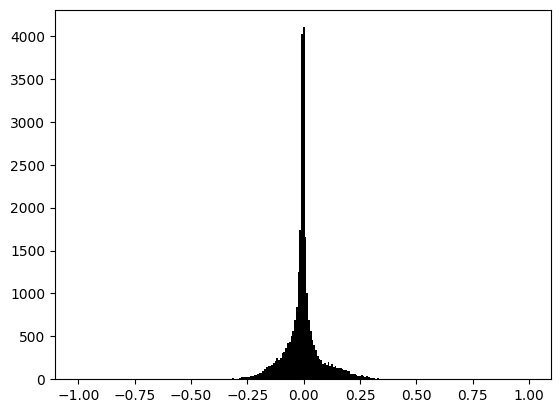

In [ ]:
# TEST CASE

def compute_histogram_filtered_test(file_path):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Calculate histogram of audio
    hist, bins = np.histogram(audio, bins=256, range=(-1, 1)) # Ours: 2^8 | Original: 2^16 bins

    # Plot histogram
    plt.figure()
    plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]), color='black')
    #plt.title('{}'.format(file_path))
    #plt.xlabel('Amplitude')
    #plt.ylabel('Frequency')
    plt.show()
    plt.close()
    #print(hist.shape)
    #print(hist.dtype)

# Test them
fileInput = deep4s_set[0][0]
print(fileInput)
compute_histogram_filtered_test(fileInput)


### Store Histograms - Regular

In [ ]:
# Training Set
#   This must run in batches. Trying to create 4200 graphs will crash the program due to a lack of RAM.
#   Batches can be as large as 900.
import os

save_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Training_Set/'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

batch_size = 900
num_batches = len(train_set) // batch_size  # Calculate the number of batches
start_index = 3900
end_index = 4199

for i in range(batch_size):
    #start_index = batch_index * batch_size
    #end_index = (batch_index + 1) * batch_size

    for i, (file_path, label) in enumerate(train_set[start_index:end_index]):
        label_dir = os.path.join(save_dir, label)
        if not os.path.isdir(label_dir):
            os.makedirs(label_dir)  # Create the directory if it doesn't exist

        hist = compute_histogram(file_path, label_dir, i + start_index)

# Process the remaining items (if any) after the last full batch
#remaining_items = len(train_set) % batch_size
#if remaining_items > 0:
    #start_index = num_batches * batch_size
    #for i, (file_path, label) in enumerate(train_set[start_index:]):
        #label_dir = os.path.join(save_dir, label)
        #if not os.path.isdir(label_dir):
            #os.makedirs(label_dir)  # Create the directory if it doesn't exist

        #hist = compute_histogram(file_path, label_dir, i + start_index)


In [ ]:
# Validation Set
save_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Validation_Set/'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

iter = 0;

for file_path, label in val_set:
    label_dir = os.path.join(save_dir, label)
    if not os.path.isdir(label_dir):
      os.makedirs(label_dir)  # Create the directory if it doesn't exist

    hist = compute_histogram(file_path, label_dir, iter)
    iter+=1

In [ ]:
# Test Set
save_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Test_Set/'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

iter = 0;

for file_path, label in test_set:
    label_dir = os.path.join(save_dir, label)
    if not os.path.isdir(label_dir):
      os.makedirs(label_dir)  # Create the directory if it doesn't exist

    hist = compute_histogram(file_path, label_dir, iter)
    iter+=1

In [ ]:
# Deep4S Test Set - SiF-DeepVC built to bypass Deep4SNet
save_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Deep4SNet_Target_Test_Set/'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

iter = 0;

for file_path, label in deep4s_set:
    label_dir = os.path.join(save_dir, label)
    if not os.path.isdir(label_dir):
      os.makedirs(label_dir)  # Create the directory if it doesn't exist

    hist = compute_histogram(file_path, label_dir, iter)
    iter+=1

In [ ]:
# Count histograms in each directory
def count_png_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".png"):
                count += 1
    return count

directories = [
    root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Training_Set/',
    root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Validation_Set/',
    root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Test_Set/',
    root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Deep4SNet_Target_Test_Set/'
]

for directory in directories:
    total_count = 0
    print("Directory:", directory)
    for sub_dir in os.listdir(directory):
        sub_dir_path = os.path.join(directory, sub_dir)
        if os.path.isdir(sub_dir_path):
            png_count = count_png_files(sub_dir_path)
            total_count += png_count
            print("   Subdirectory:", sub_dir, "| Histograms:", png_count)
    print("Total histograms: ", total_count)
    print()

Directory: /content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/Training_Set/
   Subdirectory: real | Histograms: 2094
   Subdirectory: fake | Histograms: 2099
Total histograms:  4193

Directory: /content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/Validation_Set/
   Subdirectory: real | Histograms: 680
   Subdirectory: fake | Histograms: 670
Total histograms:  1350

Directory: /content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/Test_Set/
   Subdirectory: real | Histograms: 673
   Subdirectory: fake | Histograms: 677
Total histograms:  1350

Directory: /content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/Deep4SNet_Target_Test_Set/
   Subdirectory: fake | Histograms: 1000
Total histograms:  1000



### Store Histograms - Filtered

In [ ]:
# Training Set
#   This must run in batches. Trying to create 4200 graphs will crash the program due to a lack of RAM.
#   Batches can be as large as 900.

save_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Training_Set_Filtered/'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

batch_size = 1940
num_batches = len(train_set) // batch_size  # Calculate the number of batches
start_index = 2260
end_index = 4199

for i in range(batch_size):
    #start_index = batch_index * batch_size
    #end_index = (batch_index + 1) * batch_size

    for i, (file_path, label) in enumerate(train_set[start_index:end_index]):
        label_dir = os.path.join(save_dir, label)
        if not os.path.isdir(label_dir):
            os.makedirs(label_dir)  # Create the directory if it doesn't exist

        hist = compute_histogram(file_path, label_dir, i + start_index)

# Process the remaining items (if any) after the last full batch
#remaining_items = len(train_set) % batch_size
#if remaining_items > 0:
    #start_index = num_batches * batch_size
    #for i, (file_path, label) in enumerate(train_set[start_index:]):
        #label_dir = os.path.join(save_dir, label)
        #if not os.path.isdir(label_dir):
            #os.makedirs(label_dir)  # Create the directory if it doesn't exist

        #hist = compute_histogram(file_path, label_dir, i + start_index)


In [ ]:
# Validation Set
save_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Validation_Set_Filtered/'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

iter = 0;

for file_path, label in val_set:
    label_dir = os.path.join(save_dir, label)
    if not os.path.isdir(label_dir):
      os.makedirs(label_dir)  # Create the directory if it doesn't exist

    hist = compute_histogram(file_path, label_dir, iter)
    iter+=1

In [ ]:
# Test Set
save_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Test_Set_Filtered/'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

iter = 0;

for file_path, label in test_set:
    label_dir = os.path.join(save_dir, label)
    if not os.path.isdir(label_dir):
      os.makedirs(label_dir)  # Create the directory if it doesn't exist

    hist = compute_histogram(file_path, label_dir, iter)
    iter+=1

In [ ]:
# Deep4S Test Set - SiF-DeepVC built to bypass Deep4SNet
save_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Deep4SNet_Target_Test_Set_Filtered/'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

iter = 0;

for file_path, label in deep4s_set:
    label_dir = os.path.join(save_dir, label)
    if not os.path.isdir(label_dir):
      os.makedirs(label_dir)  # Create the directory if it doesn't exist

    hist = compute_histogram(file_path, label_dir, iter)
    iter+=1

In [ ]:
# Count histograms in each directory
def count_png_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".png"):
                count += 1
    return count

directories = [
    root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Training_Set_Filtered/',
    root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Validation_Set_Filtered/',
    root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Test_Set_Filtered/',
    root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Deep4SNet_Target_Test_Set/'
]

for directory in directories:
    total_count = 0
    print("Directory:", directory)
    for sub_dir in os.listdir(directory):
        sub_dir_path = os.path.join(directory, sub_dir)
        if os.path.isdir(sub_dir_path):
            png_count = count_png_files(sub_dir_path)
            total_count += png_count
            print("   Subdirectory:", sub_dir, "| Histograms:", png_count)
    print("Total histograms: ", total_count)
    print()

Directory: /content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/Training_Set_Filtered/
   Subdirectory: real | Histograms: 2082
   Subdirectory: fake | Histograms: 2116
Total histograms:  4198

Directory: /content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/Validation_Set_Filtered/
   Subdirectory: fake | Histograms: 701
   Subdirectory: real | Histograms: 649
Total histograms:  1350

Directory: /content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/Test_Set_Filtered/
   Subdirectory: fake | Histograms: 686
   Subdirectory: real | Histograms: 664
Total histograms:  1350

Directory: /content/drive/MyDrive/Voice_Cloning_Detection/Data/SiF-DeepVC/Deep4SNet_Target_Test_Set/
   Subdirectory: fake | Histograms: 1000
Total histograms:  1000



# Format Features

### Format Histograms - SiF-DeepVC - Regular
- need to run to generate inputs for training, validation, and testing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ---------- Format training set ---------- #
train_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Training_Set'

train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    horizontal_flip=True,  # Enable horizontal flip augmentation for training data
)

# Flow training images in batches of 32 using train_datagen generator
train_generator_SiF_reg = train_datagen.flow_from_directory(
    train_dir,              # Path to the training directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format validation set ---------- #
validation_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Validation_Set'

valid_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
valid_generator_SiF_reg = valid_datagen.flow_from_directory(
    validation_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format test set ---------- #
test_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Test_Set'

test_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
test_generator_SiF_reg = test_datagen.flow_from_directory(
    test_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format deep4s test set ---------- #
deep4s_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Deep4SNet_Target_Test_Set'

deep4s_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
deep4s_generator_SiF_reg = deep4s_datagen.flow_from_directory(
    deep4s_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)

Found 4193 images belonging to 2 classes.
Found 1350 images belonging to 2 classes.
Found 1350 images belonging to 2 classes.
Found 1000 images belonging to 1 classes.


In [ ]:
classes = valid_generator_SiF_reg.classes

# Assuming 0 corresponds to real audio and 1 corresponds to fake audio
y_val = classes
print(y_val[100:250])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Format Histograms - SiF-DeepVC - Filtered (WIP)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ---------- Format training set ---------- #
train_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Training_Set_Filtered'

train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    horizontal_flip=True,  # Enable horizontal flip augmentation for training data
)

# Flow training images in batches of 32 using train_datagen generator
train_generator_SiF_filt = train_datagen.flow_from_directory(
    train_dir,              # Path to the training directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format validation set ---------- #
validation_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Validation_Set_Filtered'

valid_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
valid_generator_SiF_filt = valid_datagen.flow_from_directory(
    validation_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format test set ---------- #
test_dir = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Test_Set_Filtered'

test_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
test_generator_SiF_filt = test_datagen.flow_from_directory(
    test_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)

Found 4198 images belonging to 2 classes.
Found 1350 images belonging to 2 classes.
Found 1350 images belonging to 2 classes.


## Format Histograms - H-Voice

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ---------- Format training set ---------- #
train_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice/Training_Set'

train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    horizontal_flip=True,  # Enable horizontal flip augmentation for training data
)

# Flow training images in batches of 32 using train_datagen generator
train_generator_HVoice = train_datagen.flow_from_directory(
    train_dir,              # Path to the training directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format validation set ---------- #
validation_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice/Validation_Set'

valid_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
valid_generator_HVoice = valid_datagen.flow_from_directory(
    validation_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format test set ---------- #
test_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice/Test_Set'

test_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
test_generator_HVoice = test_datagen.flow_from_directory(
    test_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)

Found 4108 images belonging to 2 classes.
Found 1728 images belonging to 2 classes.
Found 836 images belonging to 2 classes.


## Format Histograms - H-Voice + SiF-DeepVC (Regular)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ---------- Format training set ---------- #
train_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice_SiF-Regular/Training_Set'

train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    horizontal_flip=True,  # Enable horizontal flip augmentation for training data
)

# Flow training images in batches of 32 using train_datagen generator
train_generator_H_Reg = train_datagen.flow_from_directory(
    train_dir,              # Path to the training directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format validation set ---------- #
validation_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice_SiF-Regular/Validation_Set'

valid_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
valid_generator_H_Reg = valid_datagen.flow_from_directory(
    validation_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format test set ---------- #
test_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice_SiF-Regular/Test_Set'

test_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
test_generator_H_Reg = test_datagen.flow_from_directory(
    test_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)

Found 8300 images belonging to 2 classes.
Found 3078 images belonging to 2 classes.
Found 2186 images belonging to 2 classes.


In [ ]:
# Extract the classes (labels) from the generator
classes = valid_generator_H_Reg.classes

# Assuming 0 corresponds to real audio and 1 corresponds to fake audio
y_val = classes
print(y_val)

## Format Histograms - H-Voice + SiF-DeepVC (Filtered)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ---------- Format training set ---------- #
train_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice_SiF-Filtered/Training_Set'

train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    horizontal_flip=True,  # Enable horizontal flip augmentation for training data
)

# Flow training images in batches of 32 using train_datagen generator
train_generator_H_Filt = train_datagen.flow_from_directory(
    train_dir,              # Path to the training directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format validation set ---------- #
validation_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice_SiF-Filtered/Validation_Set'

valid_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
valid_generator_H_Filt = valid_datagen.flow_from_directory(
    validation_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)


# ---------- Format test set ---------- #
test_dir = root_dir + 'Voice_Cloning_Detection/Data/H-Voice_SiF-Filtered/Test_Set'

test_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1] for validation data
)

# Flow validation images in batches of 32 using valid_datagen generator
test_generator_H_Filt = test_datagen.flow_from_directory(
    test_dir,         # Path to the validation directory
    target_size=(150, 150), # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='binary'     # Assuming binary classification
)

Found 8306 images belonging to 2 classes.
Found 3078 images belonging to 2 classes.
Found 2186 images belonging to 2 classes.


# Modeling
- Deep4SNet CNN
- https://www.sciencedirect.com/science/article/pii/S0957417421008770

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix

# Define the Deep4SNet CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape, kernel_initializer='random_normal', bias_initializer='zeros'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),

        Conv2D(32, (3, 3), strides=(1, 1), activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),

        Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),

        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='sigmoid')  # Output layer
    ])
    return model

In [ ]:
from sklearn.metrics import confusion_matrix

# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model trained on training set
model_our_SiF_regular = create_cnn_model(input_shape, num_classes)
model_our_SiF_regular.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_our_SiF_regular.fit(train_generator_SiF_reg, epochs=10)
model_our_SiF_regular.summary()  # Print model summary
model_our_SiF_regular.save(root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-SiF-Regular')

Epoch 1/10
132/132 [==============================] - 1286s 10s/step - loss: 0.3667 - accuracy: 0.8691
Epoch 2/10
132/132 [==============================] - 163s 1s/step - loss: 0.1146 - accuracy: 0.9609
Epoch 3/10
132/132 [==============================] - 157s 1s/step - loss: 0.0924 - accuracy: 0.9714
Epoch 4/10
132/132 [==============================] - 155s 1s/step - loss: 0.0789 - accuracy: 0.9750
Epoch 5/10
132/132 [==============================] - 155s 1s/step - loss: 0.0704 - accuracy: 0.9759
Epoch 6/10
132/132 [==============================] - 157s 1s/step - loss: 0.0613 - accuracy: 0.9797
Epoch 7/10
132/132 [==============================] - 157s 1s/step - loss: 0.0554 - accuracy: 0.9814
Epoch 8/10
132/132 [==============================] - 155s 1s/step - loss: 0.0520 - accuracy: 0.9828
Epoch 9/10
132/132 [==============================] - 155s 1s/step - loss: 0.0426 - accuracy: 0.9855
Epoch 10/10
132/132 [==============================] - 154s 1s/step - loss: 0.0439 - accu

ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.

In [ ]:
# Evaluate model on validation set
evaluation = model_our_SiF_regular.evaluate(valid_generator_SiF_reg)

# Calculate predictions on validation set
y_pred = model_our_SiF_regular.predict(valid_generator_SiF_reg)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Extract TN, FP, FN, TP from confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate false positive rate (FPR)
FPR = FP / (FP + TN)

print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])
print("False Positive Rate (FPR):", FPR)

43/43 [==============================] - 26s 592ms/step
Evaluation Loss: 0.049368008971214294
Evaluation Accuracy: 0.9859259128570557
False Positive Rate (FPR): 0.5208955223880597


In [ ]:
# Define the Deep4SNet CNN model
def create_new_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape, kernel_initializer='random_normal', bias_initializer='zeros'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        Dropout(0.25),

        Conv2D(32, (3, 3), strides=(1, 1), activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        Dropout(0.25),

        Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        Dropout(0.25),

        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')  # Output layer
    ])
    return model

In [ ]:
# Adjusted model with increased depth and dropout rates
def create_adjusted_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape, kernel_initializer='random_normal', bias_initializer='zeros'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        Dropout(0.3),  # Increased dropout rate

        Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        Dropout(0.4),  # Increased dropout rate

        Conv2D(128, (3, 3), strides=(1, 1), activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        Dropout(0.4),  # Increased dropout rate

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Keep dropout rate for the dense layer
        Dense(num_classes, activation='sigmoid')
    ])
    return model

In [ ]:
# Adjusted model with increased depth
def create_deeper_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape, kernel_initializer='random_normal', bias_initializer='zeros'),
        Conv2D(32, (3, 3), strides=(1, 1), activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        Dropout(0.25),

        Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
        Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        Dropout(0.25),

        Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
        Conv2D(128, (3, 3), strides=(1, 1), activation='relu'),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='sigmoid')
    ])
    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# Define the Deep4SNet CNN model
def batch_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape, kernel_initializer='random_normal', bias_initializer='zeros'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),


        Conv2D(32, (3, 3), strides=(1, 1), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),

        Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),

        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='sigmoid')  # Output layer
    ])
    return model

## Original Model - Loaded

In [ ]:
from tensorflow.keras.models import load_model
model_path = root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Original-HVoice/model_Deep4SNet.h5'
weights_path = root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Original-HVoice/weights_Deep4SNet.h5'
model_original_HVoice = load_model(model_path)
model_original_HVoice.load_weights(weights_path)

## Our Model - SiF-DeepVC - Filtered
- Trained on filtered SiF-DeepVC histograms

In [ ]:
# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model trained on training set
model_our_SiF_filt = create_cnn_model(input_shape, num_classes)
model_our_SiF_filt.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_our_SiF_filt.fit(train_generator_SiF_filt, epochs=10)
model_our_SiF_filt.summary()  # Print model summary
model_our_SiF_filt.save(root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-SiF-Filtered')

Epoch 1/10
132/132 [==============================] - 684s 5s/step - loss: 0.2461 - accuracy: 0.8878
Epoch 2/10
132/132 [==============================] - 148s 1s/step - loss: 0.1065 - accuracy: 0.9647
Epoch 3/10
132/132 [==============================] - 145s 1s/step - loss: 0.0961 - accuracy: 0.9667
Epoch 4/10
132/132 [==============================] - 145s 1s/step - loss: 0.0760 - accuracy: 0.9728
Epoch 5/10
132/132 [==============================] - 141s 1s/step - loss: 0.0663 - accuracy: 0.9793
Epoch 6/10
132/132 [==============================] - 143s 1s/step - loss: 0.0547 - accuracy: 0.9795
Epoch 7/10
132/132 [==============================] - 141s 1s/step - loss: 0.0547 - accuracy: 0.9807
Epoch 8/10
132/132 [==============================] - 143s 1s/step - loss: 0.0508 - accuracy: 0.9838
Epoch 9/10
132/132 [==============================] - 144s 1s/step - loss: 0.0477 - accuracy: 0.9845
Epoch 10/10
132/132 [==============================] - 142s 1s/step - loss: 0.0511 - accura

## Our Model - SiF-DeepVC - Regular
- Trained on unfiltered SiF-DeepVC histograms

In [ ]:
# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model trained on training set
model_our_new_SiF_regular = create_new_cnn_model(input_shape, num_classes)
model_our_new_SiF_regular.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_our_new_SiF_regular.fit(train_generator_SiF_reg, epochs=10)
model_our_new_SiF_regular.summary()  # Print model summary
model_our_new_SiF_regular.save(root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-SiF-Regular')

Epoch 1/10
132/132 [==============================] - 168s 1s/step - loss: 0.4421 - accuracy: 0.7982
Epoch 2/10
132/132 [==============================] - 168s 1s/step - loss: 0.1423 - accuracy: 0.9513
Epoch 3/10
132/132 [==============================] - 163s 1s/step - loss: 0.1285 - accuracy: 0.9597
Epoch 4/10
132/132 [==============================] - 165s 1s/step - loss: 0.1141 - accuracy: 0.9637
Epoch 5/10
132/132 [==============================] - 165s 1s/step - loss: 0.1069 - accuracy: 0.9673
Epoch 6/10
132/132 [==============================] - 163s 1s/step - loss: 0.0968 - accuracy: 0.9692
Epoch 7/10
132/132 [==============================] - 162s 1s/step - loss: 0.0964 - accuracy: 0.9695
Epoch 8/10
132/132 [==============================] - 164s 1s/step - loss: 0.0854 - accuracy: 0.9728
Epoch 9/10
132/132 [==============================] - 165s 1s/step - loss: 0.0824 - accuracy: 0.9754
Epoch 10/10
132/132 [==============================] - 165s 1s/step - loss: 0.0843 - accura

In [ ]:
# Evaluate model on validation set
evaluation = model_our_new_SiF_regular.evaluate(valid_generator_SiF_reg)

# Calculate predictions on validation set
y_pred = model_our_new_SiF_regular.predict(valid_generator_SiF_reg)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)

# Extract TN, FP, FN, TP from confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate false positive rate (FPR)
FPR = FP / (FP + TN)

print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])
print("False Positive Rate (FPR):", FPR)

43/43 [==============================] - 26s 588ms/step
Evaluation Loss: 0.055775467306375504
Evaluation Accuracy: 0.9762963056564331
False Positive Rate (FPR): 0.5283582089552239


In [ ]:
# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model trained on training set
model_our_SiF_regular = create_deeper_cnn_model(input_shape, num_classes)
model_our_SiF_regular.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_our_SiF_regular.fit(train_generator_SiF_reg, epochs=10)
model_our_SiF_regular.summary()  # Print model summary
model_our_SiF_regular.save(root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-SiF-Regular')

Epoch 1/10
132/132 [==============================] - 569s 4s/step - loss: 0.5775 - accuracy: 0.6296
Epoch 2/10
132/132 [==============================] - 569s 4s/step - loss: 0.1282 - accuracy: 0.9611
Epoch 3/10
132/132 [==============================] - 574s 4s/step - loss: 0.1118 - accuracy: 0.9633
Epoch 4/10
132/132 [==============================] - 572s 4s/step - loss: 0.0934 - accuracy: 0.9721
Epoch 5/10
132/132 [==============================] - 570s 4s/step - loss: 0.0819 - accuracy: 0.9740
Epoch 6/10
132/132 [==============================] - 572s 4s/step - loss: 0.0772 - accuracy: 0.9759
Epoch 7/10
132/132 [==============================] - 576s 4s/step - loss: 0.0693 - accuracy: 0.9783
Epoch 8/10
132/132 [==============================] - 592s 4s/step - loss: 0.0686 - accuracy: 0.9778
Epoch 9/10
132/132 [==============================] - 572s 4s/step - loss: 0.0686 - accuracy: 0.9771
Epoch 10/10
132/132 [==============================] - 574s 4s/step - loss: 0.0589 - accura

In [ ]:
# ---------- NEW CNN MODEL ---------- #

# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model trained on training set
model_our_SiF_regular = create_new_cnn_model(input_shape, num_classes)
model_our_SiF_regular.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_our_SiF_regular.fit(train_generator_SiF_reg, epochs=10)
model_our_SiF_regular.summary()  # Print model summary
model_our_SiF_regular.save(root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-SiF-Regular')

Epoch 1/10
132/132 [==============================] - 154s 1s/step - loss: 0.4145 - accuracy: 0.8278
Epoch 2/10
132/132 [==============================] - 153s 1s/step - loss: 0.1200 - accuracy: 0.9599
Epoch 3/10
132/132 [==============================] - 155s 1s/step - loss: 0.1109 - accuracy: 0.9652
Epoch 4/10
132/132 [==============================] - 154s 1s/step - loss: 0.0963 - accuracy: 0.9678
Epoch 5/10
132/132 [==============================] - 154s 1s/step - loss: 0.0864 - accuracy: 0.9723
Epoch 6/10
132/132 [==============================] - 153s 1s/step - loss: 0.0764 - accuracy: 0.9742
Epoch 7/10
132/132 [==============================] - 154s 1s/step - loss: 0.0733 - accuracy: 0.9785
Epoch 8/10
132/132 [==============================] - 152s 1s/step - loss: 0.0691 - accuracy: 0.9790
Epoch 9/10
132/132 [==============================] - 151s 1s/step - loss: 0.0660 - accuracy: 0.9809
Epoch 10/10
132/132 [==============================] - 150s 1s/step - loss: 0.0631 - accura

In [ ]:
# ---------- NEW CNN MODEL ---------- #

# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model trained on training set
model_our_SiF_regular = create_adjusted_cnn_model(input_shape, num_classes)
model_our_SiF_regular.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_our_SiF_regular.fit(train_generator_SiF_reg, epochs=10)
model_our_SiF_regular.summary()  # Print model summary
model_our_SiF_regular.save(root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-SiF-Regular')

Epoch 1/10
132/132 [==============================] - 337s 3s/step - loss: 0.5465 - accuracy: 0.8016
Epoch 2/10
132/132 [==============================] - 349s 3s/step - loss: 0.1685 - accuracy: 0.9490
Epoch 3/10
132/132 [==============================] - 324s 2s/step - loss: 0.1235 - accuracy: 0.9604
Epoch 4/10
132/132 [==============================] - 332s 3s/step - loss: 0.1148 - accuracy: 0.9628
Epoch 5/10
132/132 [==============================] - 324s 2s/step - loss: 0.1097 - accuracy: 0.9626
Epoch 6/10
132/132 [==============================] - 332s 3s/step - loss: 0.0985 - accuracy: 0.9678
Epoch 7/10
132/132 [==============================] - 327s 2s/step - loss: 0.0878 - accuracy: 0.9716
Epoch 8/10
132/132 [==============================] - 335s 3s/step - loss: 0.0874 - accuracy: 0.9731
Epoch 9/10
132/132 [==============================] - 324s 2s/step - loss: 0.0755 - accuracy: 0.9754
Epoch 10/10
132/132 [==============================] - 330s 2s/step - loss: 0.0760 - accura

In [ ]:
# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model trained on training set
model_our_SiF_regular = batch_cnn_model(input_shape, num_classes)
model_our_SiF_regular.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_our_SiF_regular.fit(train_generator_SiF_reg, epochs=10)
model_our_SiF_regular.summary()  # Print model summary
model_our_SiF_regular.save(root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-SiF-Regular')

Epoch 1/10
132/132 [==============================] - 189s 1s/step - loss: 0.7503 - accuracy: 0.9161
Epoch 2/10
132/132 [==============================] - 187s 1s/step - loss: 0.1576 - accuracy: 0.9535
Epoch 3/10
132/132 [==============================] - 186s 1s/step - loss: 0.1135 - accuracy: 0.9692
Epoch 4/10
132/132 [==============================] - 187s 1s/step - loss: 0.0954 - accuracy: 0.9731
Epoch 5/10
132/132 [==============================] - 185s 1s/step - loss: 0.0952 - accuracy: 0.9731
Epoch 6/10
132/132 [==============================] - 188s 1s/step - loss: 0.0752 - accuracy: 0.9781
Epoch 7/10
132/132 [==============================] - 185s 1s/step - loss: 0.0745 - accuracy: 0.9797
Epoch 8/10
132/132 [==============================] - 185s 1s/step - loss: 0.0636 - accuracy: 0.9804
Epoch 9/10
132/132 [==============================] - 185s 1s/step - loss: 0.0602 - accuracy: 0.9812
Epoch 10/10
132/132 [==============================] - 186s 1s/step - loss: 0.0586 - accura

## Our Model - H-Voice
- Closest imitation to the loaded original model
- Trained on H-Voice histograms

In [ ]:
# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model trained on training set
model_our_HVoice = create_cnn_model(input_shape, num_classes)
model_our_HVoice.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_our_HVoice.fit(train_generator_HVoice, epochs=10)
model_our_HVoice.summary()  # Print model summary
model_our_HVoice.save(root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-HVoice')

Epoch 1/10
129/129 [==============================] - 912s 7s/step - loss: 0.7177 - accuracy: 0.5027
Epoch 2/10
129/129 [==============================] - 23s 181ms/step - loss: 0.6932 - accuracy: 0.5088
Epoch 3/10
129/129 [==============================] - 24s 190ms/step - loss: 0.6931 - accuracy: 0.5083
Epoch 4/10
129/129 [==============================] - 24s 189ms/step - loss: 0.6931 - accuracy: 0.5083
Epoch 5/10
129/129 [==============================] - 23s 181ms/step - loss: 0.6931 - accuracy: 0.5083
Epoch 6/10
129/129 [==============================] - 24s 187ms/step - loss: 0.6931 - accuracy: 0.5083
Epoch 7/10
129/129 [==============================] - 24s 184ms/step - loss: 0.6930 - accuracy: 0.5083
Epoch 8/10
129/129 [==============================] - 24s 183ms/step - loss: 0.6930 - accuracy: 0.5083
Epoch 9/10
129/129 [==============================] - 23s 179ms/step - loss: 0.6931 - accuracy: 0.5083
Epoch 10/10
129/129 [==============================] - 24s 184ms/step - los

## Our Model - H-Voice + SiF-DeepVC (Regular)

In [ ]:
# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model trained on training set
model_our_H_Voice_SiF_Reg = create_new_cnn_model(input_shape, num_classes)
model_our_H_Voice_SiF_Reg.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_our_H_Voice_SiF_Reg.fit(train_generator_H_Reg, epochs=10)
model_our_H_Voice_SiF_Reg.summary()  # Print model summary
model_our_H_Voice_SiF_Reg.save(root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-H-Voice_SiF-Regular')

Epoch 1/10
260/260 [==============================] - 1353s 5s/step - loss: 0.5717 - accuracy: 0.6669
Epoch 2/10
260/260 [==============================] - 325s 1s/step - loss: 0.4062 - accuracy: 0.7746
Epoch 3/10
260/260 [==============================] - 320s 1s/step - loss: 0.3630 - accuracy: 0.8186
Epoch 4/10
260/260 [==============================] - 321s 1s/step - loss: 0.2924 - accuracy: 0.8747
Epoch 5/10
260/260 [==============================] - 318s 1s/step - loss: 0.2639 - accuracy: 0.8927
Epoch 6/10
260/260 [==============================] - 314s 1s/step - loss: 0.2300 - accuracy: 0.9120
Epoch 7/10
260/260 [==============================] - 317s 1s/step - loss: 0.2059 - accuracy: 0.9251
Epoch 8/10
260/260 [==============================] - 315s 1s/step - loss: 0.1945 - accuracy: 0.9290
Epoch 9/10
260/260 [==============================] - 316s 1s/step - loss: 0.1924 - accuracy: 0.9339
Epoch 10/10
260/260 [==============================] - 317s 1s/step - loss: 0.1746 - accur

In [ ]:
import os
from PIL import Image
directory = root_dir + 'Voice_Cloning_Detection/Data/SiF-DeepVC/Test_Set/real'
files = os.listdir(directory)
print(files)


for file in files:
    try:
        img = Image.open(os.path.join(directory, file))
    except Exception as e:
        print(f"Error opening {file}: {e}")

['hist_0.png', 'hist_1.png', 'hist_2.png', 'hist_3.png', 'hist_6.png', 'hist_7.png', 'hist_8.png', 'hist_17.png', 'hist_18.png', 'hist_22.png', 'hist_23.png', 'hist_25.png', 'hist_27.png', 'hist_28.png', 'hist_31.png', 'hist_32.png', 'hist_34.png', 'hist_35.png', 'hist_37.png', 'hist_38.png', 'hist_42.png', 'hist_43.png', 'hist_45.png', 'hist_49.png', 'hist_51.png', 'hist_53.png', 'hist_54.png', 'hist_56.png', 'hist_57.png', 'hist_59.png', 'hist_60.png', 'hist_61.png', 'hist_62.png', 'hist_63.png', 'hist_64.png', 'hist_66.png', 'hist_68.png', 'hist_69.png', 'hist_72.png', 'hist_73.png', 'hist_74.png', 'hist_76.png', 'hist_77.png', 'hist_78.png', 'hist_83.png', 'hist_84.png', 'hist_85.png', 'hist_86.png', 'hist_88.png', 'hist_89.png', 'hist_91.png', 'hist_92.png', 'hist_95.png', 'hist_96.png', 'hist_98.png', 'hist_99.png', 'hist_100.png', 'hist_107.png', 'hist_110.png', 'hist_114.png', 'hist_116.png', 'hist_118.png', 'hist_122.png', 'hist_124.png', 'hist_126.png', 'hist_127.png', 'hist_

## Our Model - H-Voice + SiF-DeepVC (Filtered)

In [ ]:
# Model params
input_shape = (150, 150, 3)
num_classes = 1 # Number of outputs per input

# Model trained on training set
model_our_SiF_filt = create_cnn_model(input_shape, num_classes)
model_our_SiF_filt.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_our_SiF_filt.fit(train_generator_H_Filt, epochs=10)
model_our_SiF_filt.summary()  # Print model summary
model_our_SiF_filt.save(root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-H-Voice_SiF-Filtered')

Epoch 1/10
260/260 [==============================] - 2188s 8s/step - loss: 0.4745 - accuracy: 0.7324
Epoch 2/10
260/260 [==============================] - 268s 1s/step - loss: 0.3538 - accuracy: 0.8212
Epoch 3/10
260/260 [==============================] - 267s 1s/step - loss: 0.2537 - accuracy: 0.8916
Epoch 4/10
260/260 [==============================] - 268s 1s/step - loss: 0.1769 - accuracy: 0.9353
Epoch 5/10
260/260 [==============================] - 264s 1s/step - loss: 0.1434 - accuracy: 0.9505
Epoch 6/10
260/260 [==============================] - 266s 1s/step - loss: 0.1188 - accuracy: 0.9605
Epoch 7/10
260/260 [==============================] - 264s 1s/step - loss: 0.1122 - accuracy: 0.9663
Epoch 8/10
260/260 [==============================] - 264s 1s/step - loss: 0.0984 - accuracy: 0.9665
Epoch 9/10
260/260 [==============================] - 263s 1s/step - loss: 0.0962 - accuracy: 0.9706
Epoch 10/10
260/260 [==============================] - 262s 1s/step - loss: 0.0881 - accur

## Model Stacking

In [ ]:
# Implement stacking


# Performances

## on SiF-DeepVC Data - Regular

### Original-HVoice

In [ ]:
# Validation Set
evaluation_results = model_original_HVoice.evaluate(valid_generator_SiF_reg)
print(f'Validation accuracy: {evaluation_results[5] * 100}%')

43/43 [==============================] - 17s 381ms/step - loss: 13.9775 - tp: 691.0000 - fp: 641.0000 - tn: 16.0000 - fn: 2.0000 - accuracy: 0.5237 - precision: 0.5188 - recall: 0.9971 - auc: 0.5345
Validation accuracy: 52.37036943435669%


In [ ]:
# Test set
evaluation_results = model_original.evaluate(test_generator_SiF_reg)
print(f'Test accuracy: {evaluation_results[5] * 100}%')

43/43 [==============================] - 17s 396ms/step - loss: 15.8890 - tp: 643.0000 - fp: 685.0000 - tn: 21.0000 - fn: 1.0000 - accuracy: 0.4919 - precision: 0.4842 - recall: 0.9984 - auc: 0.5258
Test accuracy: 49.18518662452698%


In [ ]:
# Test on fake voices built specifically against Deep4SNet by SiF-DeepVC
evaluation_results = model_original.evaluate(deep4s_generator_SiF_reg)
print(f'Original Deep4SNet Test accuracy: {evaluation_results[5] * 100}%')

32/32 [==============================] - 12s 380ms/step - loss: 28.8742 - tp: 0.0000e+00 - fp: 986.0000 - tn: 14.0000 - fn: 0.0000e+00 - accuracy: 0.0140 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Original Deep4SNet Test accuracy: 1.4000000432133675%


### Our-SiF-Regular

In [ ]:
# Validation Set
loss_val, accuracy_val = model_our.evaluate(valid_generator_SiF_reg)
print(f'Validation accuracy: {accuracy_val * 100}%')

83/83 [==============================] - 1034s 13s/step - loss: 0.1966 - accuracy: 0.9346
Validation accuracy: 93.45510005950928%


In [ ]:
# Test set
loss_test, accuracy_test = model_our.evaluate(test_generator_SiF_reg)
print(f'Test accuracy: {accuracy_test * 100}%')

29/29 [==============================] - 349s 12s/step - loss: 0.2351 - accuracy: 0.9222
Test accuracy: 92.22221970558167%


In [ ]:
# Test on fake voices built specifically against Deep4SNet by SiF-DeepVC
loss_test, accuracy_test = model_our.evaluate(deep4s_generator_SiF_reg)
print(f'Our Deep4SNet Test accuracy: {accuracy_test * 100}%')

## on SiF-DeepVC - Filtered (WIP)

## on H-Voice

### Our-SiF-Regular

In [ ]:
from tensorflow.keras.models import load_model

# ---------- Load our saved model ---------- #
model_path = root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-SiF-Regular'
#model_path = root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our' # <- Old one. Renamed with SiF-Regular for clarity
loaded_model_our_SiF_regular = load_model(model_path)

In [ ]:
# Validation Set
loss_val, accuracy_val = loaded_model_our_SiF_regular.evaluate(valid_generator_HVoice)
print(f'Validation accuracy: {accuracy_val * 100}%')

54/54 [==============================] - 380s 7s/step - loss: 2.5095 - accuracy: 0.4907
Validation accuracy: 49.07407462596893%


In [ ]:
# Test set
loss_test, accuracy_test = loaded_model.evaluate(test_generator_HVoice)
print(f'Test accuracy: {accuracy_test * 100}%')

### Our-HVoice

In [ ]:
from tensorflow.keras.models import load_model

# ---------- Load our saved model ---------- #
model_path = root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-HVoice'
loaded_model_our_HVoice = load_model(model_path)

In [ ]:
# Validation Set
loss_val, accuracy_val = loaded_model_our_HVoice.evaluate(valid_generator_HVoice)
print(f'Validation accuracy: {accuracy_val * 100}%')

54/54 [==============================] - 10s 174ms/step - loss: 0.6933 - accuracy: 0.5000
Validation accuracy: 50.0%


### Original-HVoice

In [ ]:
from tensorflow.keras.models import load_model
model_path = root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Original-HVoice/model_Deep4SNet.h5'
weights_path = root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Original-HVoice/weights_Deep4SNet.h5'
model_original_HVoice = load_model(model_path)
model_original_HVoice.load_weights(weights_path)

In [ ]:
# Validation Set
loss_val, accuracy_val = model_original_HVoice.evaluate(valid_generator_HVoice)
print(f'Validation accuracy: {accuracy_val * 100}%')

# Performance Metrics (WIP)
- FPR (false positive rate) as used in SiF-DeepVC paper https://ieeexplore.ieee.org/document/10301243

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict probabilities for the test set
y_pred_proba = model.predict(test_generator) # ----- CHANGE for Models ---------------

# Convert probabilities to binary predictions (0 or 1) based on a threshold
threshold = 0.5  # You can adjust this threshold if needed
y_pred_binary = (y_pred_proba > threshold).astype(int)

# Get true labels for the test set
y_true = test_generator.classes # ----- CHANGE for Models ---------------

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Extract true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP) from the confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Compute false positive rate (FPR)
FPR = FP / (FP + TN)

print("False Positive Rate (FPR):", FPR)


29/29 [==============================] - 214s 8s/step
False Positive Rate (FPR): 0.21810089020771514
